# EDA PROCESSS

**Pocess to explore the data and identify patterns in the data**

## Steps taken
1. Load the cleaned data set
2. Understand the datatypes of the cleaned dataset
3. Convert all date/times to standard format for code understandability
4. Calculate and visualize defaulters and their distribution vs non defaulters
5. Analyze defaulters against loan product
6. Analyze whether people who borrow more have a higher default rate than those who borrow smaller amounts



In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt 
import seaborn as sns


pd.set_option("display.max_columns", 100)


In [4]:
# Load the main dataset 
df = pd.read_csv('data/cleaned_dataset.csv')

# Display the first few rows of the dataset 
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,1819,female,8000.0,3500,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,green grocery (fruit/vegetables),2017
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,molo,2026-02-01,1818,female,9600.0,2500,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,retail shop,2019
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,engineer,2025-12-31,1815,female,8000.0,3500,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,green grocery (fruit/vegetables),2014
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,molo,2025-12-30,1814,female,10000.0,1500,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,green grocery (fruit/vegetables),2018
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,molo,2025-12-29,1813,female,10000.0,1500,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,bureau & publishing services,2018


In [5]:
# Learn more about the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LoanId                        3472 non-null   int64  
 1   AmountDisbursed               3472 non-null   int64  
 2   Interest                      3472 non-null   int64  
 3   LoanBalance                   3472 non-null   float64
 4   BorrowDate                    3472 non-null   object 
 5   Product                       3472 non-null   object 
 6   Branch                        3472 non-null   object 
 7   ClearDate                     3472 non-null   object 
 8   CustomerId                    3472 non-null   int64  
 9   Gender                        3472 non-null   object 
 10  LoanLimit                     3472 non-null   float64
 11  CreditScore                   3472 non-null   int64  
 12  loan_repayment_txn_count      3472 non-null   int64  
 13  loa

In [6]:
# Convert date columns to datetime format for easier analysis

# BorrowDate is mostly MM/DD/YYYY
df["BorrowDate"] = pd.to_datetime(df["BorrowDate"], errors="coerce", dayfirst=False)

# These are mostly DD/MM/YYYY
df["loan_repayment_first_payment"] = pd.to_datetime(df["loan_repayment_first_payment"], errors="coerce", dayfirst=True)
df["loan_repayment_last_payment"] = pd.to_datetime(df["loan_repayment_last_payment"], errors="coerce", dayfirst=True)

# These are mostly in YYYY-MM-DD format
df["ClearDate"] = pd.to_datetime(df["ClearDate"], errors="coerce", format="%Y-%m-%d")
df.head()

/var/folders/5p/2pw15q4x1f70w9_510db6p2m0000gp/T/ipykernel_28308/4099672203.py:7: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["loan_repayment_first_payment"] = pd.to_datetime(df["loan_repayment_first_payment"], errors="coerce", dayfirst=True)
/var/folders/5p/2pw15q4x1f70w9_510db6p2m0000gp/T/ipykernel_28308/4099672203.py:8: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["loan_repayment_last_payment"] = pd.to_datetime(df["loan_repayment_last_payment"], errors="coerce", dayfirst=True)


,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,1819,female,8000.0,3500,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,green grocery (fruit/vegetables),2017
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,molo,2026-02-01,1818,female,9600.0,2500,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,retail shop,2019
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,engineer,2025-12-31,1815,female,8000.0,3500,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,green grocery (fruit/vegetables),2014
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,molo,2025-12-30,1814,female,10000.0,1500,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,green grocery (fruit/vegetables),2018
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,molo,2025-12-29,1813,female,10000.0,1500,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,bureau & publishing services,2018


In [7]:
df.shape

(3472, 21)

In [8]:
df.describe(include='all')  

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished
count,3472.000000,3472.000000,3472.000000,3472.000000,3472,3472,3472,3472,3472.000000,3472,3472.000000,3472.000000,3472.000000,3472.000000,3472,3472,3472.000000,3472.000000,3472,3472,3472.000000
unique,NaN,NaN,NaN,NaN,NaN,6,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,53,NaN
top,NaN,NaN,NaN,NaN,NaN,5 weeks credit ease,molo,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,food & hospitality,green grocery (fruit/vegetables),NaN
freq,NaN,NaN,NaN,NaN,NaN,2580,2348,NaN,NaN,1849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2068,1085,NaN
mean,797698.403514,8337.557604,2845.420219,756.391593,2025-02-19 20:48:48.110599168,NaN,NaN,2025-02-20 18:54:19.907834112,1221.078629,NaN,14185.570276,2639.660138,11.567684,10403.112327,2025-03-16 08:59:35.115207168,2025-04-25 05:56:40.921658880,229.177419,2.472350,NaN,NaN,2018.009505
min,313772.000000,3000.000000,1000.000000,0.000000,2024-02-13 00:00:00,NaN,NaN,2021-12-11 00:00:00,23.000000,NaN,2400.000000,0.000000,1.000000,13.000000,2024-02-13 00:00:00,2024-03-04 00:00:00,0.000000,0.000000,NaN,NaN,2010.000000
25%,725419.250000,5000.000000,1500.000000,0.000000,2024-08-30 00:00:00,NaN,NaN,2024-09-05 00:00:00,1058.000000,NaN,8200.000000,2000.000000,6.000000,6500.000000,2024-10-25 18:00:00,2024-12-10 18:00:00,0.000000,0.000000,NaN,NaN,2016.000000
50%,798236.500000,7000.000000,2000.000000,0.000000,2025-03-14 00:00:00,NaN,NaN,2025-03-08 00:00:00,1232.000000,NaN,11200.000000,2000.000000,8.000000,9000.000000,2025-04-12 12:00:00,2025-05-26 00:00:00,0.000000,0.000000,NaN,NaN,2018.000000
75%,866482.250000,10000.000000,3150.000000,0.000000,2025-08-14 00:00:00,NaN,NaN,2025-08-13 00:00:00,1445.250000,NaN,16200.000000,2500.000000,14.000000,12750.000000,2025-08-11 00:00:00,2025-09-23 00:00:00,0.000000,5.000000,NaN,NaN,2020.000000
max,952310.000000,60000.000000,25000.000000,45500.000000,2025-12-11 00:00:00,NaN,NaN,2026-09-01 00:00:00,1819.000000,NaN,117000.000000,20000.000000,207.000000,74000.000000,2025-11-30 00:00:00,2025-12-01 00:00:00,21940.000000,12.000000,NaN,NaN,2025.000000


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 LoanId                          0
AmountDisbursed                 0
Interest                        0
LoanBalance                     0
BorrowDate                      0
Product                         0
Branch                          0
ClearDate                       0
CustomerId                      0
Gender                          0
LoanLimit                       0
CreditScore                     0
loan_repayment_txn_count        0
loan_repayment_total_paid       0
loan_repayment_first_payment    0
loan_repayment_last_payment     0
loan_overpayment                0
MissedInstalments               0
Industry                        0
BusinessType                    0
YearEstablished                 0
dtype: int64


In [10]:
# More data cleaning 
# A customer cannot make a repayment 100 days BEFORE they borrowed the money.
# We allow a small buffer (-10 days) for potential booking errors, but anything less is garbage.

df['days_to_first'] = (df['loan_repayment_first_payment'] - df['BorrowDate']).dt.days
df = df[(df['days_to_first'] >= -10) | (df['days_to_first'].isna())].copy()

In [11]:
# The data logs the same loan twice. We keep only the first instance.
df = df.drop_duplicates(subset=['CustomerId', 'BorrowDate'], keep='first')

In [12]:
# A loan cannot be cleared BEFORE it was borrowed.
df = df[df['ClearDate'] >= df['BorrowDate']].copy()

In [13]:
# A business established in 2024 cannot borrow money in 2023.
df = df[df['YearEstablished'] <= df['BorrowDate'].dt.year].copy()

In [14]:
df.shape

(1569, 22)

### OPTIONAL: HANDLING STRANGE PAYMENT DESCREPANCIES
- Issue: Some loans show Balance <= 0 (Cleared) but TotalPaid < Principal.
- For behavioral modeling, we KEEP them because the "Cleared" status is likely correct (Human verification and system payment upload issues),
- and the "TotalPaid" is likely wrong (System log failure).

In [16]:
# Understading the target variable Default where default is when ClearDate is greater than 2025-12-15 and LoanBalance is greater than 0
defaulters = ((df['ClearDate'] < '2025-12-15') & (df['LoanBalance'] > 0)).astype(int)
print("Number of defaulters:", defaulters.sum())

# Calculate the percentage of defaults vs non-defaults
default_counts = defaulters.value_counts(normalize=True) * 100
print("Percentage of Defaults vs Non-Defaults:\n", default_counts)


Number of defaulters: 133
Percentage of Defaults vs Non-Defaults:
 0    91.523263
1     8.476737
Name: proportion, dtype: float64


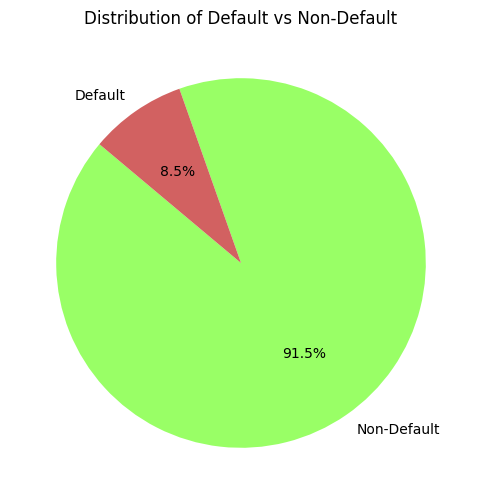

In [17]:
# Visyalize the distribution of the target variable as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(default_counts, labels=['Non-Default', 'Default'], autopct='%1.1f%%', startangle=140, colors=["#99ff66","#d26161"])
plt.title('Distribution of Default vs Non-Default')
plt.show()


In [18]:
# Cleanup to remove Product types (sme - 3 months, sme - 4 months and 12 weeks credit ease) fron the dataset
df = df[~df['Product'].isin(['sme - 3 months', 'sme - 4 months', '12 weeks credit ease'])]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1565 entries, 0 to 3469
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LoanId                        1565 non-null   int64         
 1   AmountDisbursed               1565 non-null   int64         
 2   Interest                      1565 non-null   int64         
 3   LoanBalance                   1565 non-null   float64       
 4   BorrowDate                    1565 non-null   datetime64[ns]
 5   Product                       1565 non-null   object        
 6   Branch                        1565 non-null   object        
 7   ClearDate                     1565 non-null   datetime64[ns]
 8   CustomerId                    1565 non-null   int64         
 9   Gender                        1565 non-null   object        
 10  LoanLimit                     1565 non-null   float64       
 11  CreditScore                   1565 

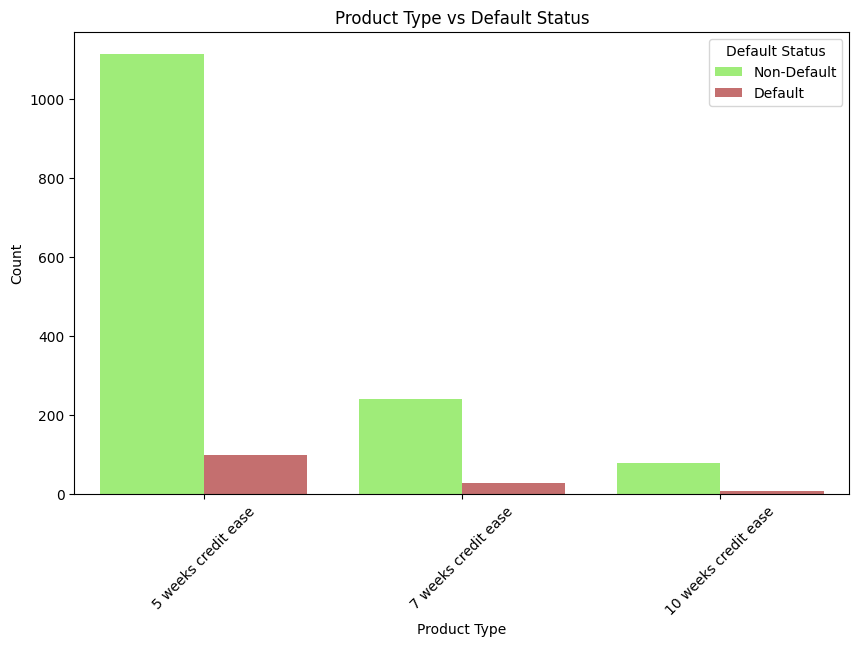

In [19]:
# Analyze relationships between Product and the default
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product', hue=defaulters, palette=["#99ff66","#d26161"])
plt.title('Product Type vs Default Status')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.legend(title='Default Status', labels=['Non-Default', 'Default'])
plt.xticks(rotation=45)
plt.show()

/var/folders/5p/2pw15q4x1f70w9_510db6p2m0000gp/T/ipykernel_28308/1008584025.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


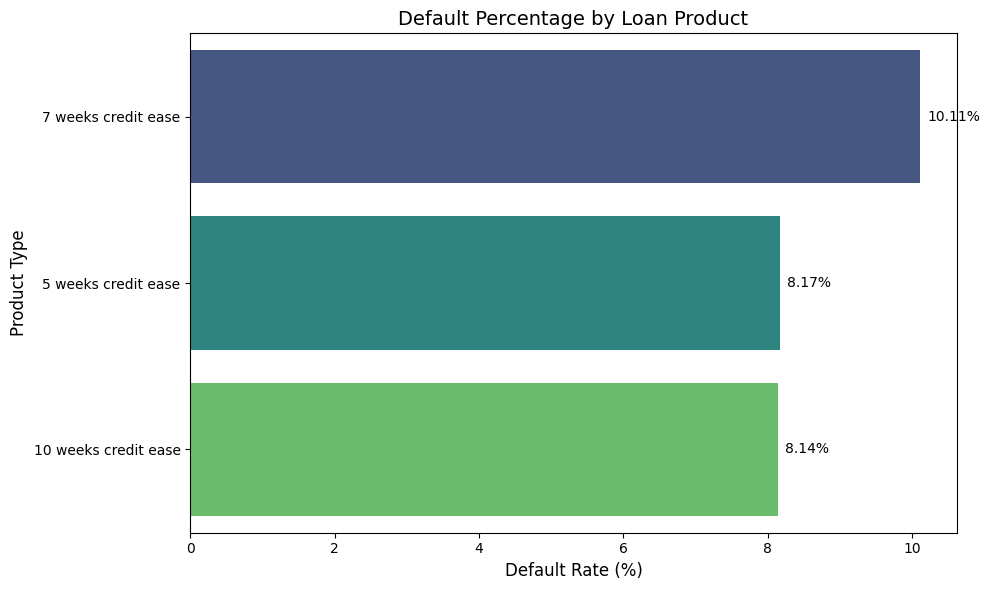

In [20]:
# Introduce bool (1,0) for isDefault
df['IsDefault'] = defaulters

# Calculate default percentages per product type
# Group by Product and take the mean of the 'IsDefault' column
product_defaults = df.groupby('Product')['IsDefault'].mean().reset_index()
product_defaults['Default Percentage'] = product_defaults['IsDefault'] * 100

# Sort the data (descending) so the riskiest products are at the top
product_defaults = product_defaults.sort_values(by='Default Percentage', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Default Percentage', 
    y='Product', 
    data=product_defaults, 
    palette='viridis'
)
plt.title('Default Percentage by Loan Product', fontsize=14)
plt.xlabel('Default Rate (%)', fontsize=12)
plt.ylabel('Product Type', fontsize=12)

# Add the actual percentage text next to each bar
for index, value in enumerate(product_defaults['Default Percentage']):
    plt.text(value + 0.1, index, f'{value:.2f}%', va='center')

plt.tight_layout()
plt.show()

/var/folders/5p/2pw15q4x1f70w9_510db6p2m0000gp/T/ipykernel_28308/812319263.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_amount_defaults = df.groupby('LoanAmountBin')['IsDefault'].mean().reset_index()
/var/folders/5p/2pw15q4x1f70w9_510db6p2m0000gp/T/ipykernel_28308/812319263.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


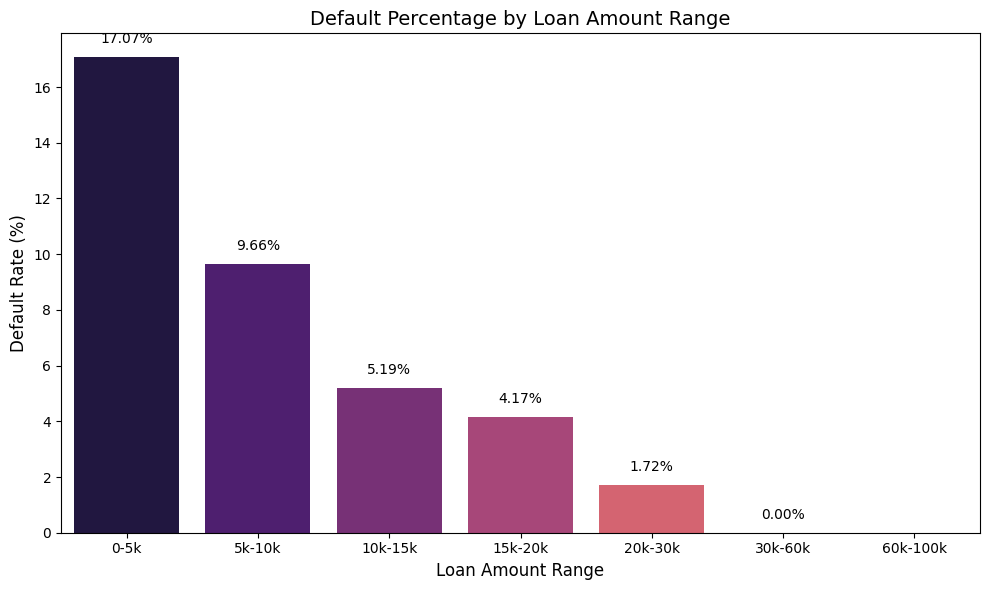

In [21]:
# Analyze relationship between LoanAmount and IsDefault using a binned bar plot for differet loan ranges
# Define bins and labels for loan amounts
bins = [0, 5000, 10000, 15000, 20000, 30000, 60000, 100000] 
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-30k', '30k-60k', '60k-100k']

# Create a new column for binned loan amounts
df['LoanAmountBin'] = pd.cut(df['AmountDisbursed'], bins=bins, labels=labels, right=False)

# Calculate the average default rate for each range
loan_amount_defaults = df.groupby('LoanAmountBin')['IsDefault'].mean().reset_index()
loan_amount_defaults['Default Percentage'] = loan_amount_defaults['IsDefault'] * 100
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='LoanAmountBin', 
    y='Default Percentage', 
    data=loan_amount_defaults, 
    palette='magma'
)
plt.title('Default Percentage by Loan Amount Range', fontsize=14)
plt.xlabel('Loan Amount Range', fontsize=12)
plt.ylabel('Default Rate (%)', fontsize=12)
# Add the actual percentage text above each bar
for index, value in enumerate(loan_amount_defaults['Default Percentage']):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')  
plt.tight_layout()
plt.show()


In [22]:
# Get the number of loans more than 30,000
high_value_loans = df[df['AmountDisbursed'] > 30000]
print("Number of loans greater than 30,000:", high_value_loans.shape[0])

Number of loans greater than 30,000: 8


Customer loan counts:
 CustomerId
1048    16
1026    15
484     15
1000    14
1019    13
        ..
1300     1
1323     1
1357     1
1398     1
787      1
Name: count, Length: 629, dtype: int64


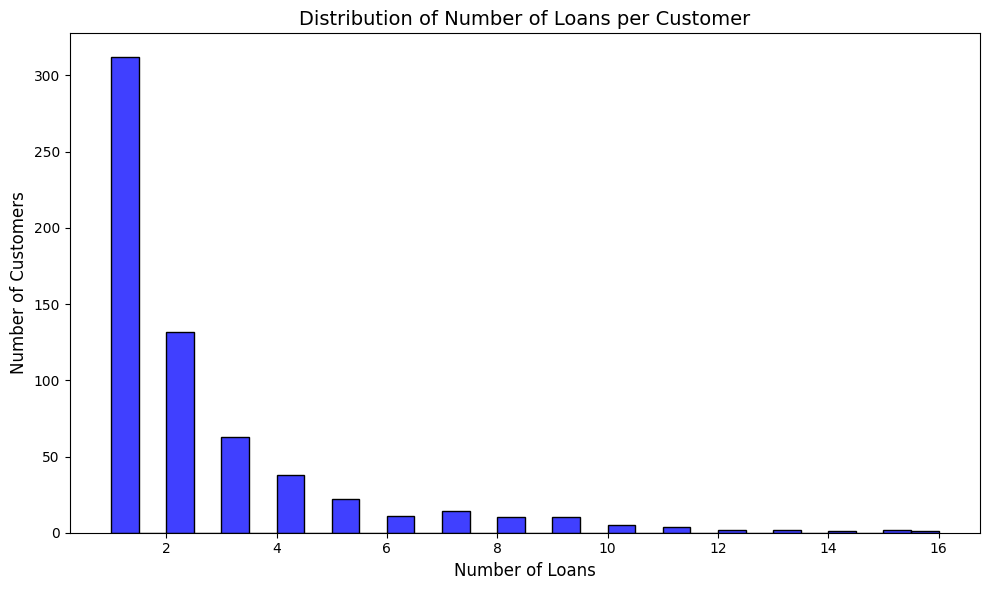

In [24]:
# Get the customer loan counts based on CustomerId and plot as a histogram
customer_loan_counts = df['CustomerId'].value_counts()
print("Customer loan counts:\n", customer_loan_counts)
plt.figure(figsize=(10, 6))
sns.histplot(customer_loan_counts, bins=30, kde=False, color='blue')
plt.title('Distribution of Number of Loans per Customer', fontsize=14)
plt.xlabel('Number of Loans', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.tight_layout()
plt.show()

In [25]:
# Get the number of customers with 1 loan
single_loan_customers = customer_loan_counts[customer_loan_counts == 1].count()
print("Number of customers with 1 loan:", single_loan_customers)

Number of customers with 1 loan: 312


/var/folders/5p/2pw15q4x1f70w9_510db6p2m0000gp/T/ipykernel_28308/3148774744.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


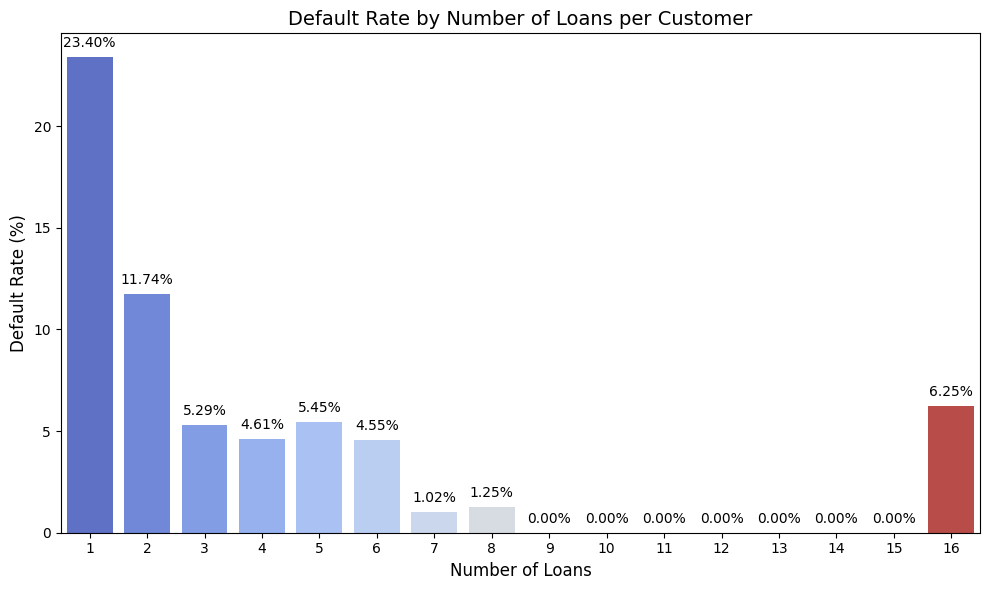

In [26]:
# Visualize the default rate based on the number of loans per customer as a bar plot
loan_count_defaults = df.groupby(df['CustomerId'].map(customer_loan_counts))['IsDefault'].mean().reset_index()
loan_count_defaults.columns = ['Number of Loans', 'Default Rate']
loan_count_defaults['Default Rate'] *= 100  
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Number of Loans', 
    y='Default Rate', 
    data=loan_count_defaults, 
    palette='coolwarm'
)
plt.title('Default Rate by Number of Loans per Customer', fontsize=14)
plt.xlabel('Number of Loans', fontsize=12)
plt.ylabel('Default Rate (%)', fontsize=12)
# Add the actual percentage text above each bar
for index, value in enumerate(loan_count_defaults['Default Rate']):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')
plt.tight_layout()
plt.show()

/var/folders/5p/2pw15q4x1f70w9_510db6p2m0000gp/T/ipykernel_28308/2459696359.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


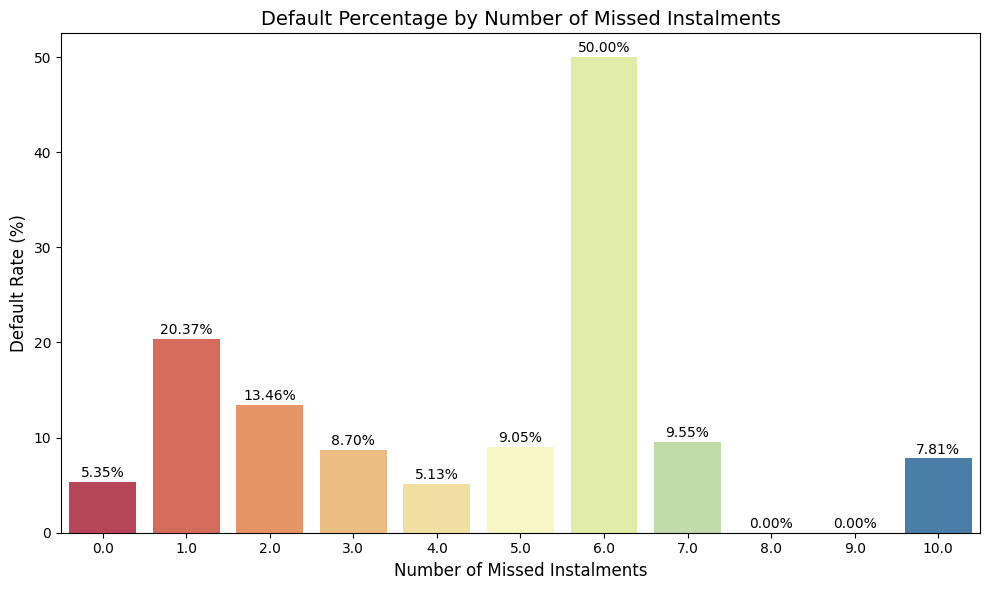

In [27]:
# Visualize the relationship between MissedInstalments and IsDefault using a bar plot
missed_instalment_defaults = df.groupby('MissedInstalments')['IsDefault'].mean().reset_index()
missed_instalment_defaults['Default Percentage'] = missed_instalment_defaults['IsDefault'] * 100
plt.figure(figsize=(10, 6))
sns.barplot(
    x='MissedInstalments', 
    y='Default Percentage', 
    data=missed_instalment_defaults, 
    palette='Spectral'
)
plt.title('Default Percentage by Number of Missed Instalments', fontsize=14)
plt.xlabel('Number of Missed Instalments', fontsize=12)
plt.ylabel('Default Rate (%)', fontsize=12)
# Add the actual percentage text above each bar
for index, value in enumerate(missed_instalment_defaults['Default Percentage']):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')
plt.tight_layout()
plt.show()

/var/folders/5p/2pw15q4x1f70w9_510db6p2m0000gp/T/ipykernel_28308/592463311.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_repayment_defaults = df.groupby('LoanRepaymentTxnCountBin')['IsDefault'].mean().reset_index()
/var/folders/5p/2pw15q4x1f70w9_510db6p2m0000gp/T/ipykernel_28308/592463311.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


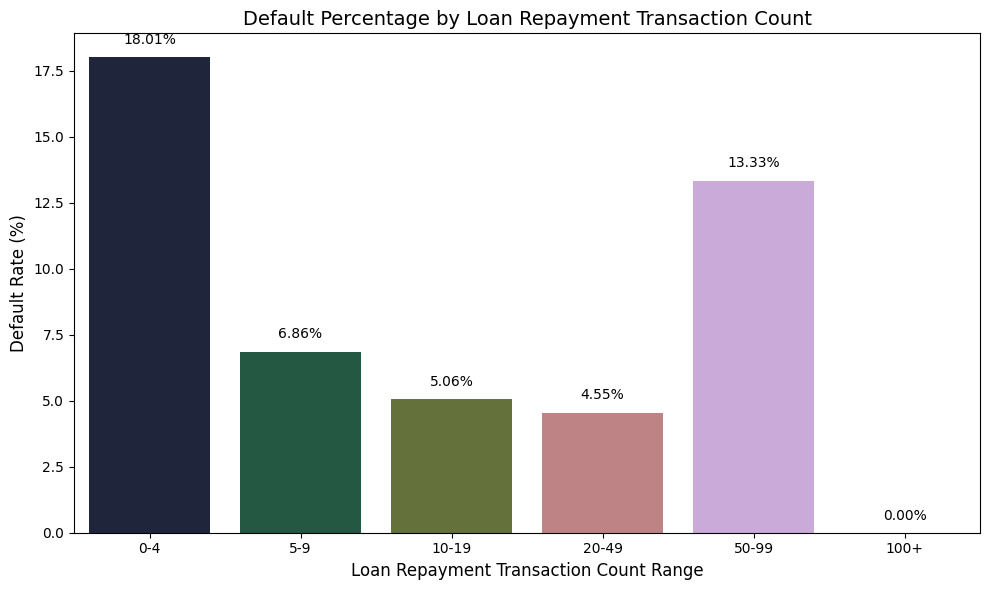

In [28]:
# Visualize the loan_repayment_txn_count against IsDefault using a bar plot in buckets
# Define bins and labels for loan repayment transaction counts
bins = [0, 5, 10, 20, 50, 100, 500]
labels = ['0-4', '5-9', '10-19', '20-49', '50-99', '100+']
# Create a new column for binned loan repayment transaction counts
df['LoanRepaymentTxnCountBin'] = pd.cut(df['loan_repayment_txn_count'], bins=bins, labels=labels, right=False)          
loan_repayment_defaults = df.groupby('LoanRepaymentTxnCountBin')['IsDefault'].mean().reset_index()
loan_repayment_defaults['Default Percentage'] = loan_repayment_defaults['IsDefault'] * 100
plt.figure(figsize=(10, 6))
sns.barplot(
    x='LoanRepaymentTxnCountBin', 
    y='Default Percentage', 
    data=loan_repayment_defaults, 
    palette='cubehelix'
)
plt.title('Default Percentage by Loan Repayment Transaction Count', fontsize=14)
plt.xlabel('Loan Repayment Transaction Count Range', fontsize=12)
plt.ylabel('Default Rate (%)', fontsize=12)
# Add the actual percentage text above each bar
for index, value in enumerate(loan_repayment_defaults['Default Percentage']):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')
plt.tight_layout()
plt.show()

In [29]:
# calculate the number of loan_repayment_txn_count with very high counts and show the individuals
high_txn_count = df[df['loan_repayment_txn_count'] > 100]
print("Number of loans with repayment transaction count greater than 100:", high_txn_count.shape[0])
print(high_txn_count[['CustomerId', 'loan_repayment_txn_count', 'IsDefault']])


Number of loans with repayment transaction count greater than 100: 3
      CustomerId  loan_repayment_txn_count  IsDefault
3465         469                       107          0
3468         782                       140          0
3469         469                       141          0


In [30]:
# calculate the number of loan_repayment_txn_count with counts between 50 and 100 and show the individuals
medium_txn_count = df[(df['loan_repayment_txn_count'] >= 50) & (df['loan_repayment_txn_count'] <= 100)]
print("Number of loans with repayment transaction count between 50 and 100:", medium_txn_count.shape[0])
print(medium_txn_count[['CustomerId', 'loan_repayment_txn_count', 'IsDefault']])   



Number of loans with repayment transaction count between 50 and 100: 15
      CustomerId  loan_repayment_txn_count  IsDefault
3423        1240                        51          0
3427        1011                        53          0
3428         889                        53          0
3431        1011                        55          0
3433         782                        56          1
3434        1355                        58          1
3437         832                        59          0
3438         469                        59          0
3440        1121                        60          0
3441        1121                        60          0
3449         469                        70          0
3455         787                        73          0
3457         469                        76          0
3458         469                        80          0
3460        1011                        88          0


In [31]:
# Get situation where loan_repayment_last_payment is before BorrowDate
invalid_payments = df[df['loan_repayment_last_payment'] < df['BorrowDate']]
print("Number of loans with last payment date before borrow date:", invalid_payments.shape[0])

Number of loans with last payment date before borrow date: 4


       DaysToLastPayment
count        1565.000000
mean          112.486901
std           125.482881
min           -10.000000
25%            27.000000
50%            60.000000
75%           161.000000
max           650.000000


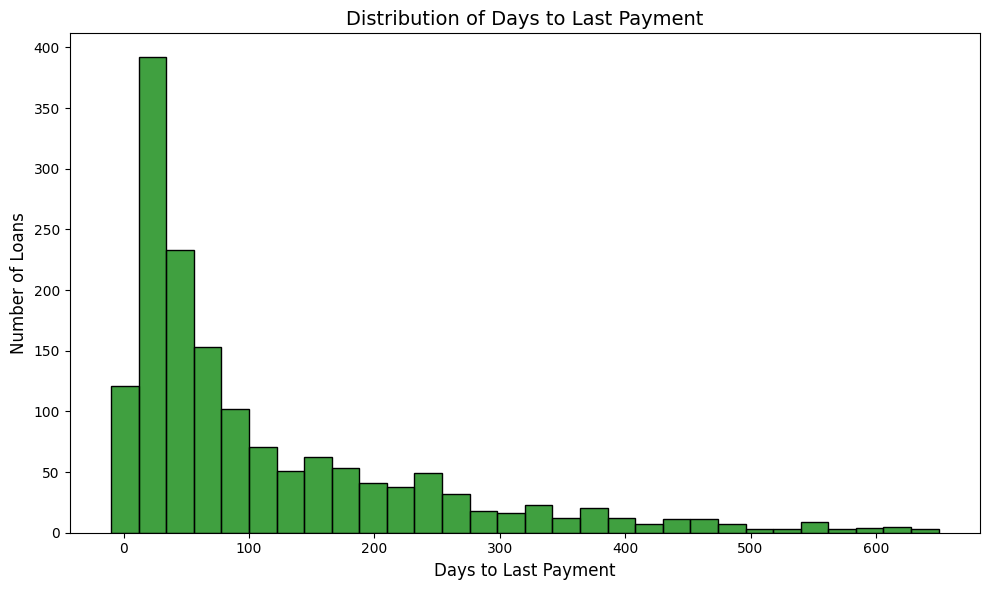

In [32]:
# Understand the loan_repayment_last_payment as number of days since BorrowDate and view it as a table and histogram and show statistics with value labels
df['DaysToLastPayment'] = (df['loan_repayment_last_payment'] - df['BorrowDate']).dt.days
print(df[['DaysToLastPayment']].describe())
plt.figure(figsize=(10, 6))
sns.histplot(df['DaysToLastPayment'], bins=30, kde=False, color='green')
plt.title('Distribution of Days to Last Payment', fontsize=14)
plt.xlabel('Days to Last Payment', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)
plt.tight_layout()
plt.show()



In [33]:
# Sort by Customer and Date to ensure correct order
df = df.sort_values(by=['CustomerId', 'BorrowDate'])

In [34]:
# All loans are at least cycle 2 (the first loan is cycle 1, which we have removed during preprocessing)
# Calculate Loan Cycle (Cycle 2, 3, etc.)
df['Loan_Sequence'] = df.groupby('CustomerId').cumcount() + 2

In [35]:
# Look at the PREVIOUS loan's behavior for each customer
df['Prev_MissedInstalments'] = df.groupby('CustomerId')['MissedInstalments'].shift(1)
df['Prev_TxnCount'] = df.groupby('CustomerId')['loan_repayment_txn_count'].shift(1)

In [36]:
# We remove the first loan for each customer because they have no history to analyze
history_df = df.dropna(subset=['Prev_MissedInstalments', 'Prev_TxnCount']).copy()

/var/folders/5p/2pw15q4x1f70w9_510db6p2m0000gp/T/ipykernel_28308/2613482399.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = history_df.groupby('History_Group')['IsDefault'].mean() * 100
/var/folders/5p/2pw15q4x1f70w9_510db6p2m0000gp/T/ipykernel_28308/2613482399.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.index, y=default_rates.values, palette='RdYlGn_r') # Red to Green color map


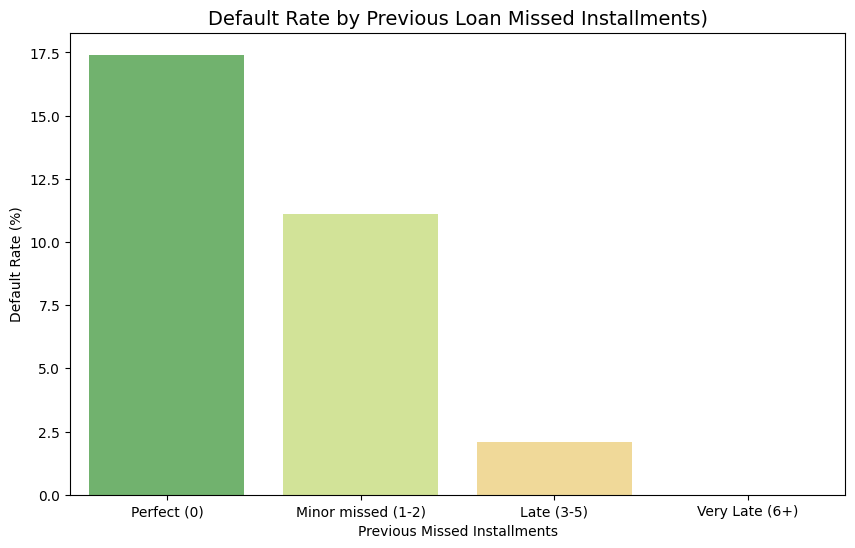

In [ ]:
# Visualize the relationship between previous missed installments and current default rate

plt.figure(figsize=(10, 6))

# Bin the missed installments into groups
# Groups of bins (perfect - no missed, minor missed, late, very late)
history_df['History_Group'] = pd.cut(history_df['Prev_MissedInstalments'], 
                                     bins=[-1, 0, 2, 5, 100], 
                                     labels=['Perfect (0)', 'Minor missed (1-2)', 'Late (3-5)', 'Very Late (6+)'])

# Calculate Default Rate per group
default_rates = history_df.groupby('History_Group')['IsDefault'].mean() * 100

# Plot
sns.barplot(x=default_rates.index, y=default_rates.values, palette='RdYlGn_r') # Red to Green color map
plt.title('Default Rate by Previous Loan Missed Installments)', fontsize=14)
plt.ylabel('Default Rate (%)')
plt.xlabel('Previous Missed Installments')
plt.show()

/var/folders/5p/2pw15q4x1f70w9_510db6p2m0000gp/T/ipykernel_28308/1029549691.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = history_df.pivot_table(index='Txn_Group', columns='History_Group', values='IsDefault', aggfunc='mean') * 100


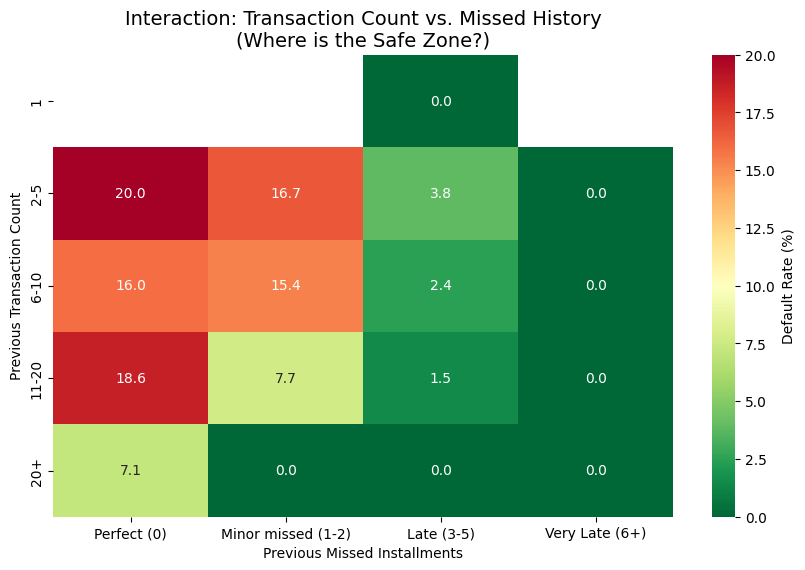

In [40]:
# Interaction: Transaction Count vs. Missed History Heatmap

# Bin Transaction Counts
history_df['Txn_Group'] = pd.cut(history_df['Prev_TxnCount'], 
                                 bins=[0, 1, 5, 10, 20, 100], 
                                 labels=['1', '2-5', '6-10', '11-20', '20+'])

# Create Pivot Table
pivot_table = history_df.pivot_table(index='Txn_Group', columns='History_Group', values='IsDefault', aggfunc='mean') * 100

# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='RdYlGn_r', cbar_kws={'label': 'Default Rate (%)'})
plt.title('Interaction: Transaction Count vs. Missed History\n(Where is the Safe Zone?)', fontsize=14)
plt.ylabel('Previous Transaction Count')
plt.xlabel('Previous Missed Installments')
plt.show()

/var/folders/5p/2pw15q4x1f70w9_510db6p2m0000gp/T/ipykernel_28308/2711962718.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = history_df.pivot_table(index='Experience_Group', columns='History_Group', values='IsDefault', aggfunc='mean') * 100


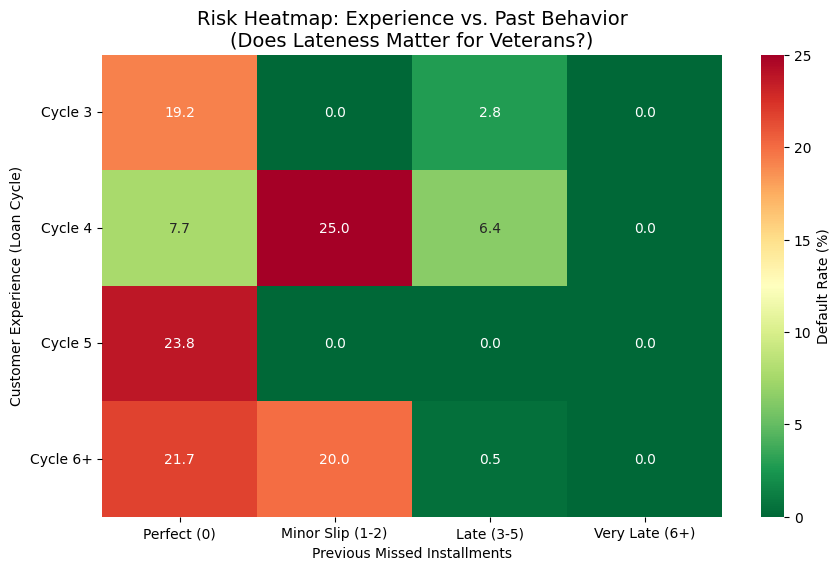

In [41]:
# Experience: Loan Cycle vs. Missed History Heatmap

# 4. Create Bins
# Behavior Bins
history_df['History_Group'] = pd.cut(history_df['Prev_MissedInstalments'], 
                                     bins=[-1, 0, 2, 5, 100], 
                                     labels=['Perfect (0)', 'Minor Slip (1-2)', 'Late (3-5)', 'Very Late (6+)'])

# Experience Bins (Loan Cycles)
history_df['Experience_Group'] = pd.cut(history_df['Loan_Sequence'], 
                                      bins=[1.9, 2.9, 3.9, 4.9, 5.9, 100], 
                                      labels=['Cycle 2', 'Cycle 3', 'Cycle 4', 'Cycle 5', 'Cycle 6+'])

# 5. Create Heatmap
pivot_table = history_df.pivot_table(index='Experience_Group', columns='History_Group', values='IsDefault', aggfunc='mean') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='RdYlGn_r', cbar_kws={'label': 'Default Rate (%)'})
plt.title('Risk Heatmap: Experience vs. Past Behavior\n(Does Lateness Matter for Veterans?)', fontsize=14)
plt.ylabel('Customer Experience (Loan Cycle)')
plt.xlabel('Previous Missed Installments')
plt.yticks(rotation=0)
plt.show()

/var/folders/5p/2pw15q4x1f70w9_510db6p2m0000gp/T/ipykernel_28308/2235172533.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  late_risk = history_df[history_df['Is_Late']].groupby('Sequence_Group')['IsDefault'].mean() * 100


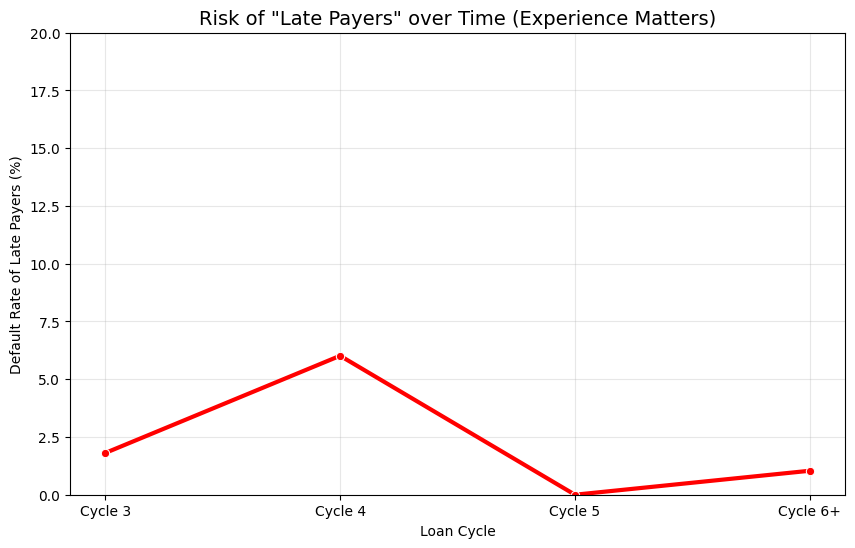

In [42]:

# Experience: Loan Cycle vs. Late Payers Line Plot
# Bin Loan Sequence
history_df['Sequence_Group'] = pd.cut(history_df['Loan_Sequence'], 
                                      bins=[1.9, 2.9, 3.9, 4.9, 5.9, 100], 
                                      labels=['Cycle 2', 'Cycle 3', 'Cycle 4', 'Cycle 5', 'Cycle 6+'])

# Flag Late Payers
history_df['Is_Late'] = history_df['Prev_MissedInstalments'] > 0

# Calculate Risk ONLY for Late Payers
late_risk = history_df[history_df['Is_Late']].groupby('Sequence_Group')['IsDefault'].mean() * 100

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=late_risk.index, y=late_risk.values, marker='o', color='red', linewidth=3)
plt.title('Risk of "Late Payers" over Time (Experience Matters)', fontsize=14)
plt.ylabel('Default Rate of Late Payers (%)')
plt.xlabel('Loan Cycle')
plt.ylim(0, 20) # Set limit to see the drop clearly
plt.grid(True, alpha=0.3)
plt.show()

/var/folders/5p/2pw15q4x1f70w9_510db6p2m0000gp/T/ipykernel_28308/1117974814.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Payer_Style', y='LoanLimit', data=history_df, palette='Set2')


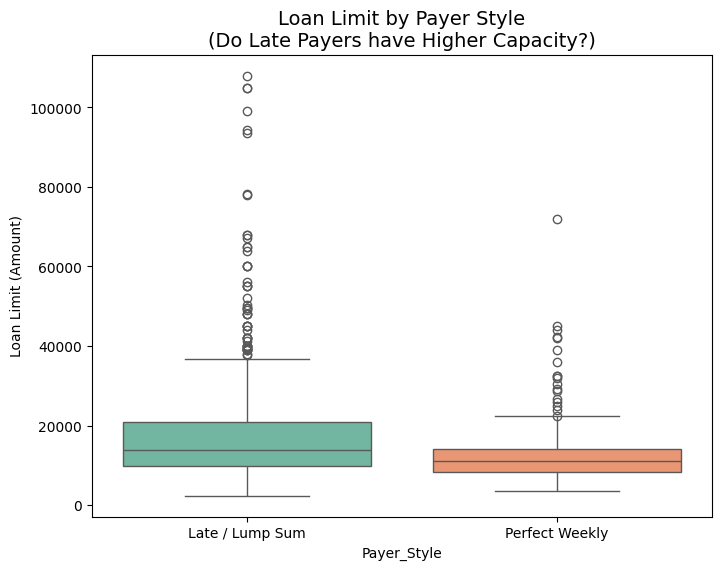

In [45]:
# Capacity: Loan Limit vs. Payer Style Box Plot

# Define Payer Style
history_df['Payer_Style'] = history_df['Prev_MissedInstalments'].apply(lambda x: 'Late / Lump Sum' if x > 0 else 'Perfect Weekly')

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Payer_Style', y='LoanLimit', data=history_df, palette='Set2')
plt.title('Loan Limit by Payer Style\n(Do Late Payers have Higher Capacity?)', fontsize=14)
plt.ylabel('Loan Limit (Amount)')
plt.show()